<a id='table'></a>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#8F00FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b> Table of contents </b></p>
</div>

* [1. Introduction](#Introduction)
* [2. GeoSpatial analysis for wild fire in different forests](#Importingdataset)
  * [2.1. Intial Explanatory analysis on the sqlite3 dataset ](#Meta)
  * [2.2. sqlite3 queries](#imshow)
* [Conclusion](#Conclusion)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#8F00FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b></b></p>
</div>
<a id='Introduction'></a>

#  <b><span style='color:#8F00FF'>| 1. </span> Introduction </b>

[Table of contents](#table)

In this Notebook The Wild Fire Geospatial data is used and the aim is to feature fire locations and combine the given information to provide a more detailed statics for this phenomena in the north america forest sites.  

In this Notebook, first an analysis and executation of 7 SQL queries is done. Later a Visual Explanatory analysis is performed on the data and finally there GeoSpatial analysis based on varied folium map sets are presented.   

##  <b><span style='color:#8F00FF'>| 1.1. </span> What is sqlite3 dataset in the geospatial context?  </b>


[sqlite3](https://docs.python.org/3/library/sqlite3.html) is a C library that provides a lightwieght disk-based database. 

Sqlite3 has some advantages. One of them is that it does not require a separate server process and the other one is that it allows accessing the database with any nonstandarrd variant of the SQL query Language. 

Here we reading a sqlite3 file and it is possible to execute PostgreSQL or Oracle queries beside the standard versions. 

To do so first we create a database or here dataset connection and then we need to use a database cursor. 

In [2]:
import sqlite3
import pandas as pd
import altair as alt 

# Create a SQL connection to our SQLite database
conn = sqlite3.connect("../input/188-million-us-wildfires/FPA_FOD_20170508.sqlite")

cur = conn.cursor()

df = pd.read_sql( """ 
                        SELECT *
                        from fires 
                        
                       """, con=conn)



In [3]:

pd.set_option('display.float_format', lambda x: '%.2f'  % x) 

conn = sqlite3.connect("../input/188-million-us-wildfires/FPA_FOD_20170508.sqlite")

fires = pd.read_sql("""SELECT * FROM fires""", con=conn) 


In [4]:
data = pd.read_sql("""

SELECT *
FROM fires
LIMIT 100

""",con = conn) 

pd.set_option('display.max_columns', None)

data.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.50,33,1300,9.00,Miscellaneous,2453403.50,33.00,1730,0.10,A,40.04,-121.01,5.00,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.50,133,0845,1.00,Lightning,2453137.50,133.00,1530,0.25,A,38.93,-120.40,5.00,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2453156.50,152,1921,5.00,Debris Burning,2453156.50,152.00,2024,0.10,A,38.98,-120.74,13.00,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.50,180,1600,1.00,Lightning,2453189.50,185.00,1400,0.10,A,38.56,-119.91,5.00,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.50,180,1600,1.00,Lightning,2453189.50,185.00,1200,0.10,A,38.56,-119.93,5.00,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [5]:
data.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   OBJECTID                    100 non-null    int64  
 1   FOD_ID                      100 non-null    int64  
 2   FPA_ID                      100 non-null    object 
 3   SOURCE_SYSTEM_TYPE          100 non-null    object 
 4   SOURCE_SYSTEM               100 non-null    object 
 5   NWCG_REPORTING_AGENCY       100 non-null    object 
 6   NWCG_REPORTING_UNIT_ID      100 non-null    object 
 7   NWCG_REPORTING_UNIT_NAME    100 non-null    object 
 8   SOURCE_REPORTING_UNIT       100 non-null    object 
 9   SOURCE_REPORTING_UNIT_NAME  100 non-null    object 
 10  LOCAL_FIRE_REPORT_ID        100 non-null    object 
 11  LOCAL_INCIDENT_ID           99 non-null     object 
 12  FIRE_CODE                   88 non-null     object 
 13  FIRE_NAME                   100 non-

<div style="color:white;display:fill;border-radius:8px;
            background-color:#8F00FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b></b></p>
</div>
<a id='Introduction'></a>

#  <b><span style='color:#8F00FF'>| 2. </span> Expanatory data analysis With sqlite Queries </b>
[Table of contents](#table)

Here in order to gain a better insight in regard to data, this query group <ins>SOURCE REPORTING UNIT NAME</ins> based on the number of repetition and incident occurrence. Each query is limited so that RAM usage remains optimum.





In [7]:
pd.read_sql("""
                SELECT SOURCE_REPORTING_UNIT_NAME,count(*) as [count]
                FROM fires
                GROUP BY SOURCE_REPORTING_UNIT_NAME
                ORDER BY count
                LIMIT 30;
""",con = conn)

,SOURCE_REPORTING_UNIT_NAME,count
0,356 VFD,1
1,ADAIR CO RFD #3,1
2,AMISTAD NATIONAL RECREATION AREA,1
3,APOSTLE ISLANDS NATONAL LAKESHORE,1
4,ARAPAHO NWR,1
5,ARROWWOOD NWR,1
6,ASH MEADOWS NWR,1
7,ATTWATER PRAIRIE CHICKEN NATIONAL WILDLIFE REFUGE,1
8,AVA CITY FD,1
9,AZS Prescott,1


In [8]:
query = pd.read_sql(""" SELECT *
                         FROM fires
                         Order BY FIRE_CODE
                         LIMIT 10; """, conn) 

query

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.50,180,1600,1.00,Lightning,2453189.50,185,1400,0.10,A,38.56,-119.91,5.00,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
1,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.50,180,1600,1.00,Lightning,2453189.50,185,1200,0.10,A,38.56,-119.93,5.00,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
2,6,6,FS-1418849,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,54,8,None,HIDDEN,None,None,None,None,None,2004,2453186.50,182,1800,1.00,Lightning,2453187.50,183,1600,0.10,A,38.64,-120.10,5.00,USFS,CA,5,005,Amador,b'\x00\x01\xad\x10\x00\x00\xf0<~\x90\xa1\x06^\...
3,7,7,FS-1418851,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,58,9,None,FORK,None,None,None,None,None,2004,2453187.50,183,1800,1.00,Lightning,2453188.50,184,1400,0.10,A,38.69,-120.15,5.00,USFS,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00$o\x996\xd0\t^\xc0h\...
4,10,10,FS-1418859,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,61,10,None,TANGLEFOOT,None,None,None,None,None,2004,2453187.50,183,1800,1.00,Lightning,2453188.50,184,1800,0.10,A,38.55,-120.15,5.00,USFS,CA,5,005,Amador,b'\x00\x01\xad\x10\x00\x00dS\\\xf2\x8b\t^\xc0\...
5,11,11,FS-1418861,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,64,11,None,FORK #2,None,None,None,None,None,2004,2453188.50,184,1830,1.00,Lightning,2453189.50,185,1900,0.10,A,38.69,-120.16,5.00,USFS,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\x0c\xd6\x8b\xe38\n^...
6,12,12,FS-1418863,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,71,14,None,MOKE #2,None,None,None,None,None,2004,2453188.50,184,1730,1.00,Lightning,2453189.50,185,2000,0.10,A,38.53,-120.11,5.00,USFS,CA,5,005,Amador,b'\x00\x01\xad\x10\x00\x00L\xcc@\x86\xca\x06^\...
7,13,13,FS-1418865,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,91,26,None,WRIGHTS,None,None,None,None,None,2004,2453251.50,247,1600,9.00,Miscellaneous,2453251.50,247,1630,0.10,A,38.79,-120.19,5.00,USFS,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_\x0c^\...
8,14,14,FS-1418872,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,99,21,None,TIGER,None,None,None,None,None,2004,2453276.50,272,1200,4.00,Campfire,2453276.50,272,1800,6.00,B,38.43,-120.51,14.00,MISSING/NOT SPECIFIED,CA,5,005,Amador,b'\x00\x01\xad\x10\x00\x00p=\n\xd7\xa3 ^\xc0\x...
9,15,15,FS-1418874,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,102,28,None,BROWN,None,None,None,None,None,2004,2453281.50,277,0630,1.00,Lightning,2453281.50,277,1500,0.20,A,38.68,-120.28,5.00,USFS,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00P\xb7\x06\xf8\xe6\x1...


<div style="color:white;display:fill;border-radius:8px;
            background-color:#8F00FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b></b></p>
</div>
<a id='Introduction'></a>

#  <b><span style='color:#8F00FF'>| 3. </span> Grouping the fires based on the forest locations </b>

[Table of contents](#table) 

For instance **Eldorado National Forest** has the highest number of incedients. Seeing the details based on the **site location** moreover looking at the number of accidents provide better overview of the data. The query down below serves this.



In [9]:
query_2 = pd.read_sql("""SELECT *
                         FROM fires
                         ORDER BY SOURCE_REPORTING_UNIT
                         LIMIT 35;""", conn)
query_2

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1453043,20008650,MOSFM-10105,NONFED,ST-MOMOS,ST/C&L,USMOMOS,Missouri Department of Conservation,00102,ADAIR CO RFD #3,None,None,None,None,None,None,None,None,None,1999,2451372.50,194,0600,13.00,Missing/Undefined,None,None,None,1.00,B,40.28,-92.60,8.00,PRIVATE,MO,ADAIR,001,Adair,b'\x00\x01\xad\x10\x00\x00\xd4G\xa7\xae|&W\xc0...
1,1451352,20001021,MOSFM-1188,NONFED,ST-MOMOS,ST/C&L,USMOMOS,Missouri Department of Conservation,00203,FILLMORE FIRE DEPT,None,None,None,None,None,None,None,None,None,2000,2451801.50,258,1630,5.00,Debris Burning,None,None,None,15.00,C,40.03,-95.09,8.00,PRIVATE,MO,ANDREW,003,Andrew,b'\x00\x01\xad\x10\x00\x00\xd8F\x03x\x0b\xc6W\...
2,1451401,20001281,MOSFM-1473,NONFED,ST-MOMOS,ST/C&L,USMOMOS,Missouri Department of Conservation,00203,FILLMORE FIRE DEPT,None,None,None,None,None,None,None,None,None,2000,2451815.50,272,1400,5.00,Debris Burning,None,None,None,2.00,B,40.03,-95.07,8.00,PRIVATE,MO,ANDREW,003,Andrew,b'\x00\x01\xad\x10\x00\x00\xd0\xf1\x98\x81\xca...
3,1452418,20004055,MOSFM-4684,NONFED,ST-MOMOS,ST/C&L,USMOMOS,Missouri Department of Conservation,00203,FILLMORE FIRE DEPT,None,None,None,None,None,None,None,None,None,2002,2452347.50,73,1158,5.00,Debris Burning,None,None,None,50.00,C,40.06,-95.05,8.00,PRIVATE,MO,ANDREW,003,Andrew,b'\x00\x01\xad\x10\x00\x00\xb4\x974F\xeb\xc2W\...
4,1452432,20004090,MOSFM-4726,NONFED,ST-MOMOS,ST/C&L,USMOMOS,Missouri Department of Conservation,00203,FILLMORE FIRE DEPT,None,None,None,None,None,None,None,None,None,2002,2452350.50,76,1145,5.00,Debris Burning,None,None,None,1.00,B,40.06,-94.89,8.00,PRIVATE,MO,ANDREW,003,Andrew,b'\x00\x01\xad\x10\x00\x00D\xf0\xbf\x95\xec\xb...
5,1452476,20004242,MOSFM-4894,NONFED,ST-MOMOS,ST/C&L,USMOMOS,Missouri Department of Conservation,00203,FILLMORE FIRE DEPT,None,None,None,None,None,None,None,None,None,2002,2452360.50,86,1700,5.00,Debris Burning,None,None,None,3.00,B,39.98,-95.10,8.00,PRIVATE,MO,ANDREW,003,Andrew,b'\x00\x01\xad\x10\x00\x004{\xa0\x15\x18\xc6W\...
6,1453440,20009047,MOSFM-10554,NONFED,ST-MOMOS,ST/C&L,USMOMOS,Missouri Department of Conservation,00206,SAVANNAH RFD,None,None,None,None,None,None,None,None,None,1999,2451478.50,300,1240,9.00,Miscellaneous,None,None,None,5.00,B,37.62,-92.75,8.00,PRIVATE,MO,ANDREW,003,Andrew,b'\x00\x01\xad\x10\x00\x00\xe8\xe7ME*0W\xc00\x...
7,1453441,20009048,MOSFM-10555,NONFED,ST-MOMOS,ST/C&L,USMOMOS,Missouri Department of Conservation,00206,SAVANNAH RFD,None,None,None,None,None,None,None,None,None,1999,2451478.50,300,1405,5.00,Debris Burning,None,None,None,6.00,B,37.67,-92.57,8.00,PRIVATE,MO,ANDREW,003,Andrew,b'\x00\x01\xad\x10\x00\x00\x106<\xbdR$W\xc0p\x...
8,1453464,20009071,MOSFM-10578,NONFED,ST-MOMOS,ST/C&L,USMOMOS,Missouri Department of Conservation,00206,SAVANNAH RFD,None,None,None,None,None,None,None,None,None,1999,2451480.50,302,1645,7.00,Arson,None,None,None,2.00,B,37.53,-92.68,8.00,PRIVATE,MO,ANDREW,003,Andrew,b'\x00\x01\xad\x10\x00\x00\xa4\x14t{I+W\xc0\xf...
9,1453467,20009074,MOSFM-10581,NONFED,ST-MOMOS,ST/C&L,USMOMOS,Missouri Department of Conservation,00206,SAVANNAH RFD,None,None,None,None,None,None,None,None,None,1999,2451480.50,302,1600,7.00,Arson,None,None,None,2.00,B,37.55,-92.71,8.00,PRIVATE,MO,ANDREW,003,Andrew,b'\x00\x01\xad\x10\x00\x00\xe4\x87\x11\xc2\xa3...


<div style="color:white;display:fill;border-radius:8px;
            background-color:#8F00FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b></b></p>
</div>
<a id='Introduction'></a>

#  <b><span style='color:#8F00FF'>| 4. </span> The most severe Fire cases </b>
[Table of contents](#table)

With this query the most recent and the most severe fire cases are selected. They are ordered by the fire sizes. 



In [10]:
# Identifying the beggiest fire sizes 


query_2 = pd.read_sql(""" 
                        SELECT 
                        LOCAL_FIRE_REPORT_ID, 
                        DISCOVERY_DATE AS Date, 
                        STAT_CAUSE_DESCR AS MainCause, 
                        FIRE_YEAR AS Year, 
                        FIRE_SIZE 
                        FROM fires 
                        WHERE FIRE_SIZE  > 1000.00 AND year > 2010
                        ORDER BY FIRE_SIZE 
                        LIMIT 20;
                      """ , conn)

query_2


,LOCAL_FIRE_REPORT_ID,Date,MainCause,Year,FIRE_SIZE
0,None,2457173.50,Lightning,2015,1000.40
1,None,2456085.50,Miscellaneous,2012,1001.00
2,None,2456175.50,Lightning,2012,1001.50
3,None,2455799.50,Lightning,2011,1002.00
4,48,2456028.50,Debris Burning,2012,1003.00
5,4,2456856.50,Lightning,2014,1003.00
6,None,2457194.50,Lightning,2015,1003.50
7,None,2456095.50,Powerline,2012,1003.60
8,None,2456012.50,Lightning,2012,1005.00
9,110,2457248.50,Lightning,2015,1005.00


In [11]:
data.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.50,33,1300,9.00,Miscellaneous,2453403.50,33.00,1730,0.10,A,40.04,-121.01,5.00,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.50,133,0845,1.00,Lightning,2453137.50,133.00,1530,0.25,A,38.93,-120.40,5.00,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2453156.50,152,1921,5.00,Debris Burning,2453156.50,152.00,2024,0.10,A,38.98,-120.74,13.00,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.50,180,1600,1.00,Lightning,2453189.50,185.00,1400,0.10,A,38.56,-119.91,5.00,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.50,180,1600,1.00,Lightning,2453189.50,185.00,1200,0.10,A,38.56,-119.93,5.00,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


<div style="color:white;display:fill;border-radius:8px;
            background-color:#8F00FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b></b></p>
</div>
<a id='Introduction'></a>

#  <b><span style='color:#8F00FF'>| 5. </span> Further Expanatory data analysis for GeoSpatial Representation </b>

[Table of contents](#table)

When we want to implement any kind of deep learning and recommener system or plot our finding espacially on Geospatial data, often we should label_encode the needed columns with string type. 

Here four important columns of **STATE, FIRE_SIZE_CLASS, STAT_CAUSE_DESCR, FIPS_NAME, STAT_CAUSE_DESCR** are label encoded. 





In [12]:
# label encoding certain values 
from sklearn.preprocessing import LabelEncoder 
import numpy as np 

Data_toEncode = np.array(['STATE', 'FIRE_SIZE_CLASS','STAT_CAUSE_DESCR', 'FIPS_NAME', 'STAT_CAUSE_DESCR'])

labelEncoder = LabelEncoder() 

data.STATE = labelEncoder.fit_transform(data.STATE) 
data.FIPS_NAME = labelEncoder.fit_transform(data.FIPS_NAME)
data.FIRE_SIZE_CLASS = labelEncoder.fit_transform(data.FIRE_SIZE_CLASS)
data.STAT_CAUSE_DESCR = labelEncoder.fit_transform(data.STAT_CAUSE_DESCR)
data.STAT_CAUSE_DESCR = labelEncoder.fit_transform(data.STAT_CAUSE_DESCR)
data.Shape = labelEncoder.fit_transform(data.Shape)

# Label encoded data
data.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.50,33,1300,9.00,6,2453403.50,33.00,1730,0.10,0,40.04,-121.01,5.00,USFS,1,63,063,20,91
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.50,133,0845,1.00,5,2453137.50,133.00,1530,0.25,0,38.93,-120.40,5.00,USFS,1,61,061,19,35
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2453156.50,152,1921,5.00,3,2453156.50,152.00,2024,0.10,0,38.98,-120.74,13.00,STATE OR PRIVATE,1,17,017,9,82
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.50,180,1600,1.00,5,2453189.50,185.00,1400,0.10,0,38.56,-119.91,5.00,USFS,1,3,003,0,60
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.50,180,1600,1.00,5,2453189.50,185.00,1200,0.10,0,38.56,-119.93,5.00,USFS,1,3,003,0,25


In [13]:
# Fill the Nan values with avg of them  

data = data.replace({None: np.nan})
data['ICS_209_INCIDENT_NUMBER'] = data['ICS_209_INCIDENT_NUMBER'].fillna(0)
data['ICS_209_NAME'] = data['ICS_209_NAME'].fillna(0)
data['MTBS_ID'] = data['MTBS_ID'].fillna(0)
data['COMPLEX_NAME'] = data['COMPLEX_NAME'].fillna(0)
data['MTBS_FIRE_NAME'] = data['MTBS_FIRE_NAME'].fillna(0)
data['FIRE_CODE'] = data['FIRE_CODE'].fillna(0)

# replaced data and NAN values 
data

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,0,0,0,0,0.00,2005,2453403.50,33,1300,9.00,6,2453403.50,33.00,1730,0.10,0,40.04,-121.01,5.00,USFS,1,63,063,20,91
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,0,0,0,0,0.00,2004,2453137.50,133,0845,1.00,5,2453137.50,133.00,1530,0.25,0,38.93,-120.40,5.00,USFS,1,61,061,19,35
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,0,0,0,0,0.00,2004,2453156.50,152,1921,5.00,3,2453156.50,152.00,2024,0.10,0,38.98,-120.74,13.00,STATE OR PRIVATE,1,17,017,9,82
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,0,DEER,0,0,0,0,0.00,2004,2453184.50,180,1600,1.00,5,2453189.50,185.00,1400,0.10,0,38.56,-119.91,5.00,USFS,1,3,003,0,60
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,0,STEVENOT,0,0,0,0,0.00,2004,2453184.50,180,1600,1.00,5,2453189.50,185.00,1200,0.10,0,38.56,-119.93,5.00,USFS,1,3,003,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,97,FS-1419089,FED,FS-FIRESTAT,FS,USNVHTF,Humboldt-Toiyabe National Forest,0417,Humboldt-Toiyabe National Forest,1,M01,BEZ8,HOT SPRINGS,0,0,0,0,0.00,2005,2453496.50,126,1145,5.00,3,2453499.50,129.00,1330,0.10,0,38.70,-119.84,13.00,STATE OR PRIVATE,1,3,003,0,94
96,97,98,FS-1419090,FED,FS-FIRESTAT,FS,USNVHTF,Humboldt-Toiyabe National Forest,0417,Humboldt-Toiyabe National Forest,2,006,BZB0,SHINGLE,0,0,0,0,0.00,2005,2453559.50,189,0015,7.00,0,2453559.50,189.00,0045,0.01,0,38.45,-119.46,5.00,USFS,1,51,051,17,4
97,98,99,FS-1419093,FED,FS-FIRESTAT,FS,USNMCAF,Carson National Forest,0302,Carson National Forest,64,064,F064,CEDAR SPRINGS,0,0,0,0,0.00,2005,2453532.50,162,1901,1.00,5,2453532.50,162.00,2000,0.10,0,36.67,-107.25,5.00,USFS,5,39,039,21,54
98,99,100,FS-1419095,FED,FS-FIRESTAT,FS,USNMCAF,Carson National Forest,0302,Carson National Forest,84,084,F084,BUZZARD,0,0,0,0,0.00,2005,2453543.50,173,1820,1.00,5,2453543.50,173.00,2315,0.25,0,36.88,-107.22,5.00,USFS,5,39,039,21,48


In [88]:
# identifying date, year, cause and fire size after 2010

query_3 = pd.read_sql("""SELECT FIRE_SIZE, FIRE_YEAR
                         FROM fires 
                         WHERE  FIRE_SIZE > 2000.84
                         UNION 
                         SELECT STAT_CAUSE_CODE, FIRE_YEAR
                         from fires
                         WHERE FIRE_YEAR > 2010 
                         LIMIT 40;
                         """, conn)

query_3

,FIRE_SIZE,FIRE_YEAR
0,1.00,2011
1,1.00,2012
2,1.00,2013
3,1.00,2014
4,1.00,2015
5,2.00,2011
6,2.00,2012
7,2.00,2013
8,2.00,2014
9,2.00,2015


In [15]:
# using lead 
query_4 = pd.read_sql("""SELECT FIRE_SIZE,
                         DISCOVERY_TIME,
                         STAT_CAUSE_CODE, 
                         SOURCE_REPORTING_UNIT, 
                         NWCG_REPORTING_UNIT_ID, 
                         NWCG_REPORTING_UNIT_NAME, 
                         LEAD(DISCOVERY_TIME, 1, 0) OVER (ORDER BY DISCOVERY_TIME) AS DISCOVERY_TIME,
                         LEAD(DISCOVERY_TIME, 1, 0) OVER (ORDER BY DISCOVERY_TIME) - DISCOVERY_TIME AS DISCOVERY_TIME_Diff
                         FROM fires
                         LIMIT 5;
                         """, conn)

query_4

,FIRE_SIZE,DISCOVERY_TIME,STAT_CAUSE_CODE,SOURCE_REPORTING_UNIT,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,DISCOVERY_TIME,DISCOVERY_TIME_Diff
0,0.30,None,1.00,AKAKA,USAKAKA,Alaska Regional Office,None,None
1,0.10,None,1.00,AKAKA,USAKAKA,Alaska Regional Office,None,None
2,1.00,None,9.00,SDCCA,USSDCCA,Crow Creek Agency,None,None
3,0.10,None,10.00,ORWSA,USORWSA,Warm Springs Agency,None,None
4,0.10,None,9.00,MTFBA,USMTFBA,Fort Belknap Agency,None,None


In [16]:
query_5 = pd.read_sql("""SELECT 
                            fires.DISCOVERY_TIME AS Time, 
                            fires.STAT_CAUSE_CODE AS Cause_Code, 
                            count(distinct FIRE_NAME ) AS FireName,
                            count(distinct SOURCE_REPORTING_UNIT_NAME ) AS UnitName,
                            AVG(FIRE_SIZE) AS Fire_Size,  
                            AVG(Shape) AS Fire_Shape, 
                            ROUND(AVG(DISCOVERY_TIME)) AS Initial_Date, 
                            sum(CONT_TIME) AS Time,
                            sum(COUNTY) AS SubState
                            FROM fires;""", conn)


query_5

,Time,Cause_Code,FireName,UnitName,Fire_Size,Fire_Shape,Initial_Date,Time,SubState
0,1300,9.00,493633,4441,74.52,0.00,1453.00,1393492463.00,6588340.00


In [17]:
query_6 = pd.read_sql("""SELECT 
                                SUM(CASE 
                                    WHEN FIRE_YEAR IN (2005)
                                    THEN FIRE_SIZE
                                    ELSE 0 END) AS Fire_Id,
                                SUM(CASE
                                    WHEN DISCOVERY_TIME IN (1600)
                                    THEN FIRE_SIZE
                                    ELSE 0 END) AS  Fire_Size
                                FROM fires;""", conn)

query_6

,Fire_Id,Fire_Size
0,9665105.13,2193614.86


In [18]:
query_6 = pd.read_sql("""
                        SELECT 
                            CASE  
                            WHEN FIRE_YEAR > 2010 THEN  'New_Fire_Incedient'
                            WHEN FIRE_SIZE > 0.25 THEN 'Biggest_Fire'
                            WHEN Shape > 30 AND Shape < 90 THEN 'CirculatingFire'
                            END AS Fire_Details, 
                            COUNT(DISTINCT FIRE_SIZE) AS Number_Of_Fires
                            FROM  fires
                            GROUP BY 
                             CASE
                                WHEN FIRE_YEAR > 2010 THEN 'NewFireIncedient'
                                WHEN FIRE_SIZE > 0.25 THEN 'VastFire'
                                WHEN Shape > 25 AND Shape < 90 THEN 'CirculatingFire'
                            END;""", conn)

query_6

,Fire_Details,Number_Of_Fires
0,None,133
1,New_Fire_Incedient,6288
2,Biggest_Fire,11253


In [19]:
# fire size 
# avg time 
# avg overall rating 
# avg overll potential


query_7 = pd.read_sql("""SELECT DISTINCT NWCG_REPORTING_UNIT_NAME, LOCAL_INCIDENT_ID 
                         FROM fires AS UnitName
                         WHERE EXISTS 
                             (SELECT *
                              FROM fires
                              WHERE FIRE_SIZE > 0.90 
                              AND fires.Fire_name LIKE '%EON%')
                              LIMIT 10;""", conn)


query_7

,NWCG_REPORTING_UNIT_NAME,LOCAL_INCIDENT_ID
0,Plumas National Forest,PNF-47
1,Eldorado National Forest,13
2,Eldorado National Forest,021
3,Eldorado National Forest,6
4,Eldorado National Forest,7
5,Eldorado National Forest,8
6,Eldorado National Forest,9
7,Shasta-Trinity National Forest,02
8,Shasta-Trinity National Forest,03
9,Eldorado National Forest,10


In [20]:
query_8 = pd.read_sql("""SELECT OWNER_DESCR
                         FROM fires 
                         WHERE NWCG_REPORTING_UNIT_ID = 'USCAENF'
                         UNION ALL 
                         SELECT DISTINCT LOCAL_INCIDENT_ID
                         FROM fires
                         WHERE SOURCE_REPORTING_UNIT_NAME = 'Eldorado National Forest'
                         LIMIT 20;""", conn)

query_8 

,OWNER_DESCR
0,USFS
1,STATE OR PRIVATE
2,USFS
3,USFS
4,USFS
5,USFS
6,USFS
7,USFS
8,USFS
9,USFS


In [21]:

# removing the isnan values 
# converting the types 
# dropping the columns we do not want  


cols_to_drop = [
                'COUNTY',
                'OBJECTID', 
                'FOD_ID', 
                'LOCAL_FIRE_REPORT_ID', 
                'LOCAL_INCIDENT_ID', 
                'ICS_209_INCIDENT_NUMBER',    
                'ICS_209_NAME',
                'MTBS_ID',
                'MTBS_FIRE_NAME',
                'FIRE_CODE',
                'COMPLEX_NAME',
                'Shape',
                'FPA_ID',
                'SOURCE_REPORTING_UNIT',
                'SOURCE_SYSTEM',
                'FIRE_NAME',
                'CONT_DOY',
                'DISCOVERY_DOY',
                'DISCOVERY_TIME',
                'OWNER_DESCR'
]

df = df.drop(columns = cols_to_drop, axis=1)

In [22]:
# dataframe with dropped columns
df.head()

,SOURCE_SYSTEM_TYPE,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,STATE,FIPS_CODE,FIPS_NAME
0,FED,FS,USCAPNF,Plumas National Forest,Plumas National Forest,2005,2453403.50,9.00,Miscellaneous,2453403.50,1730,0.10,A,40.04,-121.01,5.00,CA,063,Plumas
1,FED,FS,USCAENF,Eldorado National Forest,Eldorado National Forest,2004,2453137.50,1.00,Lightning,2453137.50,1530,0.25,A,38.93,-120.40,5.00,CA,061,Placer
2,FED,FS,USCAENF,Eldorado National Forest,Eldorado National Forest,2004,2453156.50,5.00,Debris Burning,2453156.50,2024,0.10,A,38.98,-120.74,13.00,CA,017,El Dorado
3,FED,FS,USCAENF,Eldorado National Forest,Eldorado National Forest,2004,2453184.50,1.00,Lightning,2453189.50,1400,0.10,A,38.56,-119.91,5.00,CA,003,Alpine
4,FED,FS,USCAENF,Eldorado National Forest,Eldorado National Forest,2004,2453184.50,1.00,Lightning,2453189.50,1200,0.10,A,38.56,-119.93,5.00,CA,003,Alpine


<div style="color:white;display:fill;border-radius:8px;
            background-color:#8F00FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b></b></p>
</div>
<a id='Introduction'></a>

#  <b><span style='color:#8F00FF'>| 6. </span> Visualization EDA for GeoSpatial analysis </b>
[Table of contents](#table)


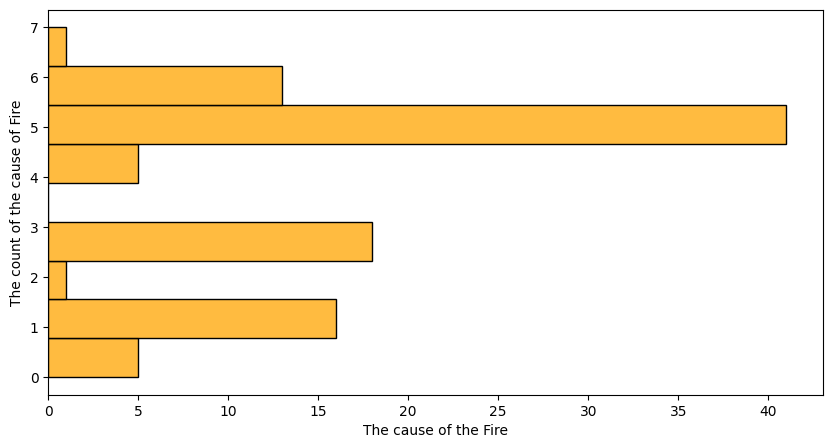

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

f, ax = plt.subplots(figsize=(10, 5))
ax = sns.histplot(data=data, y='STAT_CAUSE_DESCR', color='orange') 
ax.set_xlabel('The cause of the Fire')
ax.set_ylabel('The count of the cause of Fire')
plt.show()


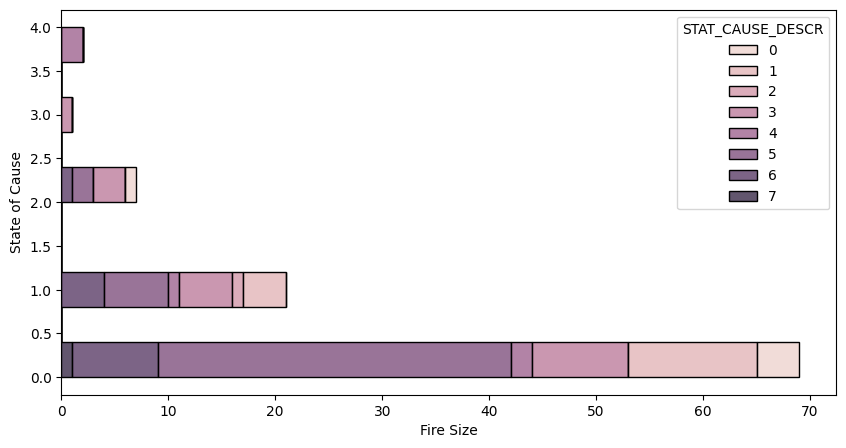

In [24]:
# Fire Groupe - hist plot stacking version 
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.histplot(data=data, y='FIRE_SIZE_CLASS', color='orange', hue='STAT_CAUSE_DESCR', multiple='stack')
ax.set_xlabel('Fire Size')
ax.set_ylabel('State of Cause')
plt.show()

In [25]:
# sql analysis with python
# group based on this - count based on the other column

pd.options.display.max_rows = None

# here we group by STAT_CAUSE_CODE and FIRE_SIZE
# as we can see the state 27 has the highest number of fires occurent 
data.groupby(['STAT_CAUSE_CODE', 'FIRE_SIZE']).count()['STATE']

STAT_CAUSE_CODE  FIRE_SIZE
1.00             0.10         27
                 0.20          2
                 0.25          4
                 0.30          1
                 0.50          3
                 2.00          1
                 2.50          1
                 10.00         1
                 45.60         1
2.00             0.10          2
                 0.60          1
                 7700.00       1
                 16823.00      1
4.00             0.10         12
                 0.50          1
                 5.00          1
                 6.00          1
                 9.00          1
5.00             0.10          6
                 0.25          3
                 0.50          1
                 0.80          1
                 1.00          1
                 2.00          1
                 3.00          1
                 10.00         1
                 17.00         1
                 25.00         1
                 125.00        1
6.00            

In [26]:
data_an = data.groupby('NWCG_REPORTING_UNIT_NAME', as_index=False).count().sort_values('FIRE_SIZE', ascending=False) 
data_an.head()

,NWCG_REPORTING_UNIT_NAME,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
10,Kootenai National Forest,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,17,17,17,18,18,18,18,18,18,18,18,18,18,18
6,Eldorado National Forest,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,16,16,17,17
11,Lincoln National Forest,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
7,Fremont-Winema National Forest,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
13,National Forests in North Carolina,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


In [27]:

acres_by_year = pd.DataFrame(fires.groupby(['FIRE_YEAR']).FIRE_SIZE.sum().sort_values(ascending=False)).reset_index() 

acres_by_year.rename(columns={'FIRE_SIZE': 'Acres'}, inplace=True) 

alt.Chart(acres_by_year).mark_line().encode( 
    alt.X('FIRE_YEAR:N', title=None), 
    alt.Y('Acres'), 
).properties(
    title=f'Acres Burned by Year', 
    width = 600, 
    height =300, 
).configure_axis(
    labelFontSize=14, 
    titleFontSize=14
)


alt.Chart(...)

In [28]:

frac_by_lightning = (fires.query('STAT_CAUSE_DESCR=="Lightning"').groupby(['FIRE_YEAR']).FIRE_SIZE.sum() / acres_by_year.set_index('FIRE_YEAR').Acres)

frac_by_lightning.name = 'frac_acres_lightning' 

frac_by_lightning = pd.DataFrame(frac_by_lightning).reset_index() 

alt.Chart(frac_by_lightning).mark_line().encode(
    alt.X('FIRE_YEAR:N', title=None), 
    alt.Y('frac_acres_lightning', title=None), 
).properties(
    title =f'Fraction of Burned Acres Caused By Lightning Induced Fires',
    width= 600, 
    height=300
).configure_axis(
     labelFontSize=14,
    titleFontSize=14
)


alt.Chart(...)

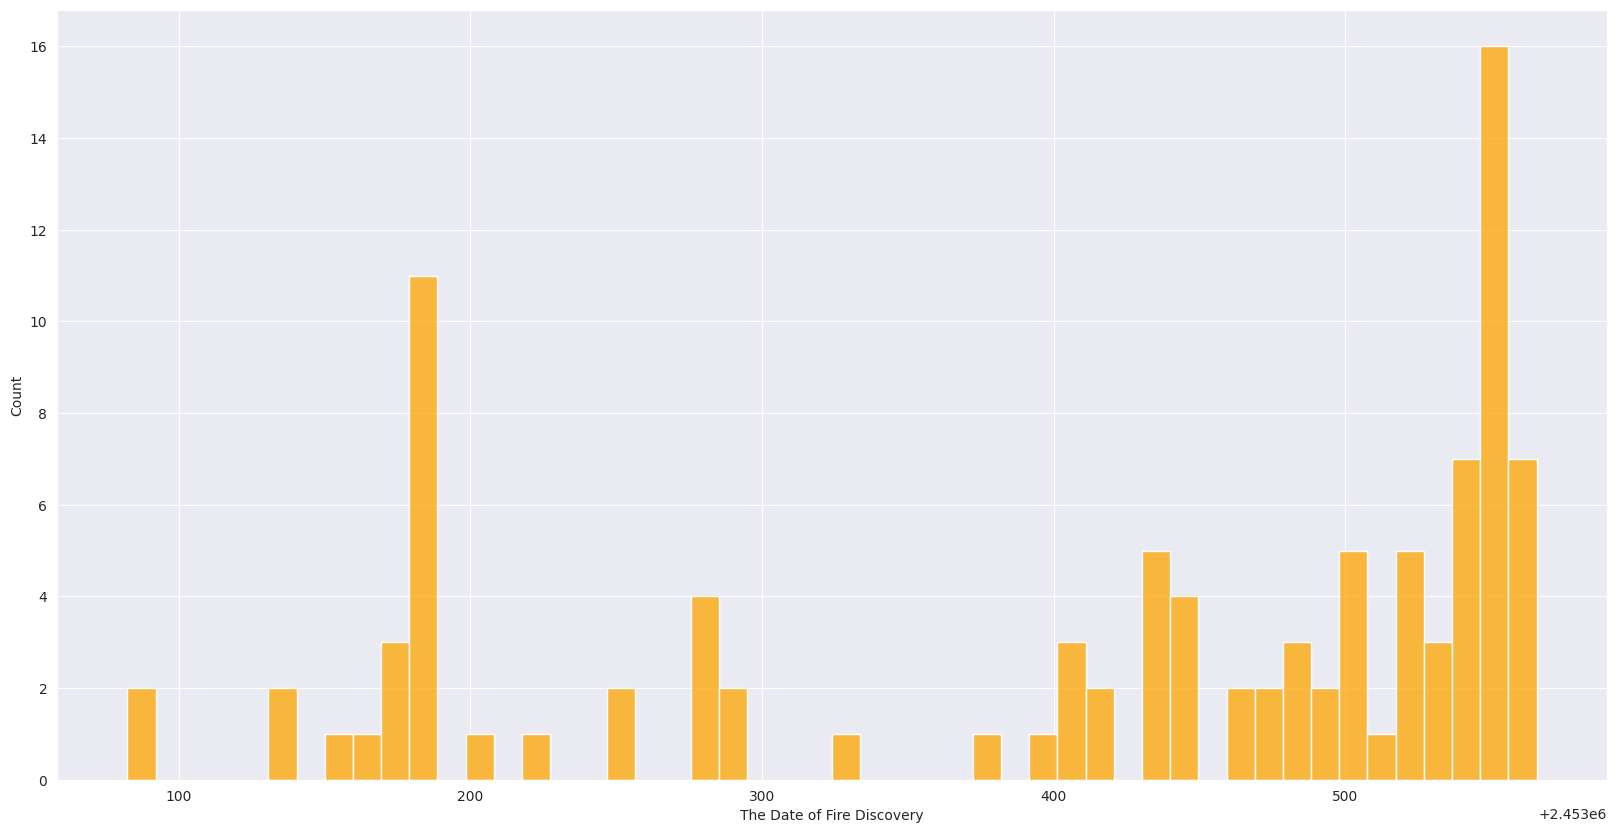

In [52]:
# Most common Fire Type  
import seaborn as sns 
from matplotlib import pyplot as plt 

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.histplot(data=data, x='DISCOVERY_DATE', bins=50, color='orange')
ax.set_xlabel('The Date of Fire Discovery')
plt.show()


<div style="color:white;display:fill;border-radius:8px;
            background-color:#8F00FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b></b></p>
</div>
<a id='Introduction'></a>

#  <b><span style='color:#8F00FF'>| 8. </span> Queries with Python GeoSpatial </b>
[Table of contents](#table)



In [30]:
grouped_data = data[['STAT_CAUSE_DESCR', 'Shape']].groupby('STAT_CAUSE_DESCR').count()
grouped_data

,Shape
STAT_CAUSE_DESCR,
0,5
1,16
2,1
3,18
4,5
5,41
6,13
7,1


<div style="color:white;display:fill;border-radius:8px;
            background-color:#8F00FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b></b></p>
</div>
<a id='Introduction'></a>

#  <b><span style='color:#8F00FF'>| 9. </span> Fire Incedent Distribution </b>
[Table of contents](#table)




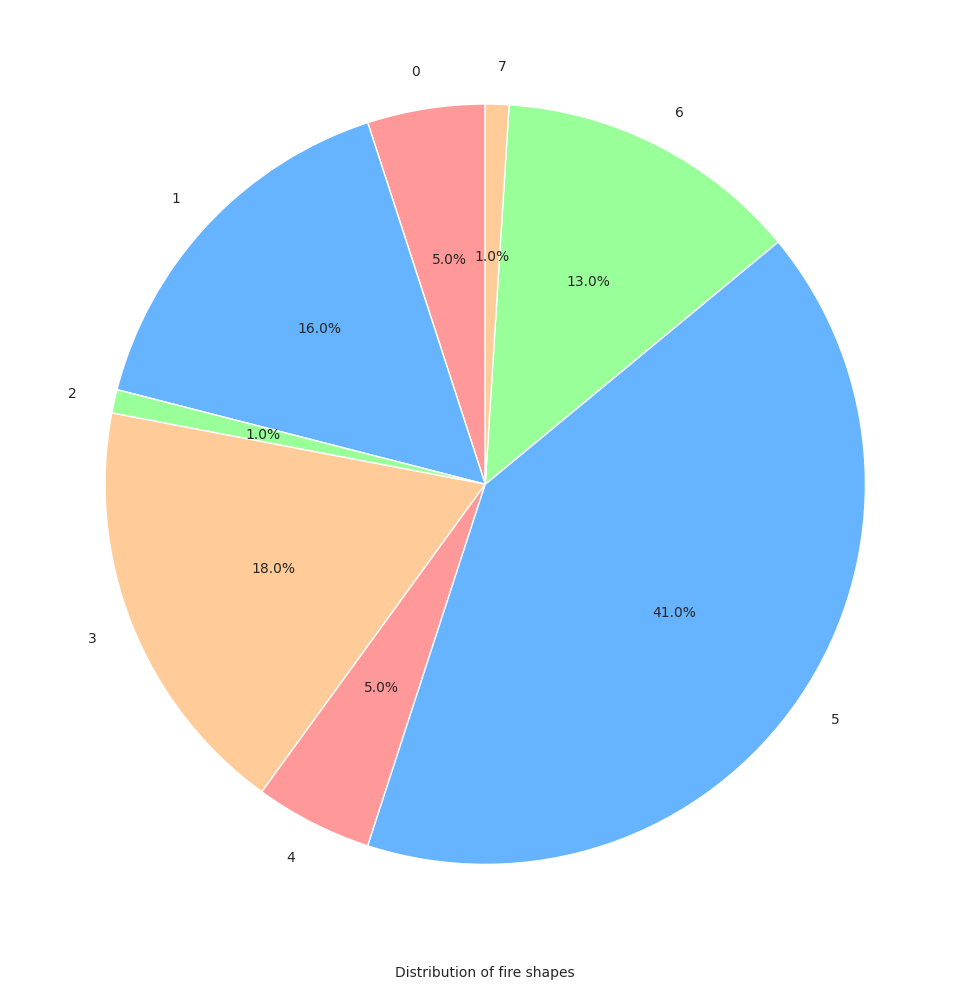

In [65]:
# pie chart version 1

sns.set_style("darkgrid") 
f, ax = plt.subplots(figsize=(20, 10))

explode = (0, 0.1, 0, 0)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  

ax.pie(grouped_data.Shape, labels=grouped_data.index, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.set_facecolor('lightgrey')
ax.set_xlabel('Distribution of fire shapes') 
plt.tight_layout()
plt.show()


In [32]:
pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 12.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 38.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


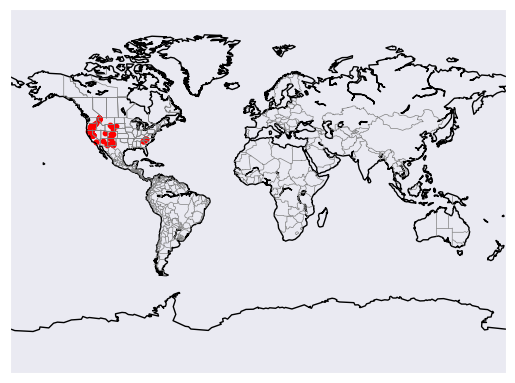

In [33]:
# continue 
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# creating the map 
m = Basemap(projection = 'mill', llcrnrlat = -90, urcrnrlat = 90, llcrnrlon = -180, urcrnrlon = 180, resolution = 'c')

m.drawcoastlines() 
m.drawcountries(color='gray')
m.drawstates(color='gray') 


# creating variable for latitude and longituse to list 

latitude = data['LATITUDE'].tolist()
longitude = data['LONGITUDE'].tolist() 

m.scatter(longitude, latitude, latlon = True, s=10, c='red', marker  ='o', alpha = 1 ) 

plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#8F00FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b></b></p>
</div>
<a id='Introduction'></a>

#  <b><span style='color:#8F00FF'>| 10. </span> Folium GeoSpatial Representation </b>
[Table of contents](#table)



In [34]:
# the folium map 

import pandas as pd
import folium 

latitude = data['LATITUDE'].fillna(0).tolist()
longitude = data['LONGITUDE'].fillna(0).tolist()

center = [20.593684,78.96288] 

map = folium.Map(location = center, zoom_start =2)


In [35]:
for i, j in data.iterrows(): 
    location = [j['LATITUDE'], j['LONGITUDE']] 
    folium.Marker(location, popup = f'Country:{j["STATE"]}').add_to(map)

In [36]:
map

In [37]:
import folium
from folium import Marker
from folium.plugins import MarkerCluster
import math

# add a circle maker 
v_map = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=4) 

# Add points to the map
mc = MarkerCluster()
for idx, row in data.iterrows(): 
    if not math.isnan(row['LONGITUDE']) and not math.isnan(row['LATITUDE']):
        mc.add_child(Marker(location=[row['LATITUDE'], row['LONGITUDE']],
                            tooltip=str(round(row['LATITUDE']*100, 2))+"%"))
v_map.add_child(mc)

# Display the map
v_map

In [38]:

import folium
from folium.plugins import HeatMap
from folium.plugins import MiniMap

df['LATITUDE']=df['LATITUDE'].astype(float)
df['LONGITUDE'] = df['LONGITUDE'].astype(float)



In [39]:

import folium

from folium.plugins import HeatMap


map_obj = folium.Map(location = [38.27312, -98.5821872], zoom_start = 4)

heat_data = [[row['LATITUDE'],row['LONGITUDE']] for index, row in data.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_obj)


map_obj


In [40]:
# heatmap with minimap and time 
from folium import plugins
from folium.plugins import MiniMap



heat_data = [[row['LATITUDE'],row['LONGITUDE']] for index, row in data.iterrows()]


map_hooray = folium.Map(location=[38.27312, -98.5821872],tiles="stamentoner", zoom_start = 13) 

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8)


MiniMap().add_to(map_hooray)


hm.add_to(map_hooray)
# Display the map
map_hooray


In [41]:
!pip install geopandas

In [42]:
%matplotlib inline

import os
import geopandas as gpd
import pandas as pd

import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import box

# sqlite3 to geopandas 
# onverting to geopandas dataframe 

DataPath = "../input/188-million-us-wildfires/FPA_FOD_20170508.sqlite"
connection = sqlite3.connect(DataPath)
cursor = connection.cursor()
gdf = gpd.GeoDataFrame(data, geometry=geopandas.points_from_xy(data.LATITUDE, data.LONGITUDE), crs="EPSG:4326")
gdf.info() 


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   OBJECTID                    100 non-null    int64   
 1   FOD_ID                      100 non-null    int64   
 2   FPA_ID                      100 non-null    object  
 3   SOURCE_SYSTEM_TYPE          100 non-null    object  
 4   SOURCE_SYSTEM               100 non-null    object  
 5   NWCG_REPORTING_AGENCY       100 non-null    object  
 6   NWCG_REPORTING_UNIT_ID      100 non-null    object  
 7   NWCG_REPORTING_UNIT_NAME    100 non-null    object  
 8   SOURCE_REPORTING_UNIT       100 non-null    object  
 9   SOURCE_REPORTING_UNIT_NAME  100 non-null    object  
 10  LOCAL_FIRE_REPORT_ID        100 non-null    object  
 11  LOCAL_INCIDENT_ID           99 non-null     object  
 12  FIRE_CODE                   100 non-null    object  
 13  FIRE_NAME    

In [43]:
# finding the geometry - This is the most important feature in Geospatial Analysis 
gdf.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,geometry
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,0,0,0,0,0.00,2005,2453403.50,33,1300,9.00,6,2453403.50,33.00,1730,0.10,0,40.04,-121.01,5.00,USFS,1,63,063,20,91,POINT (40.03694 -121.00583)
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,0,0,0,0,0.00,2004,2453137.50,133,0845,1.00,5,2453137.50,133.00,1530,0.25,0,38.93,-120.40,5.00,USFS,1,61,061,19,35,POINT (38.93306 -120.40444)
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,0,0,0,0,0.00,2004,2453156.50,152,1921,5.00,3,2453156.50,152.00,2024,0.10,0,38.98,-120.74,13.00,STATE OR PRIVATE,1,17,017,9,82,POINT (38.98417 -120.73556)
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,0,DEER,0,0,0,0,0.00,2004,2453184.50,180,1600,1.00,5,2453189.50,185.00,1400,0.10,0,38.56,-119.91,5.00,USFS,1,3,003,0,60,POINT (38.55917 -119.91333)
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,0,STEVENOT,0,0,0,0,0.00,2004,2453184.50,180,1600,1.00,5,2453189.50,185.00,1200,0.10,0,38.56,-119.93,5.00,USFS,1,3,003,0,25,POINT (38.55917 -119.93306)


In [44]:
print(gdf.crs)


EPSG:4326


In [45]:
# measuring the distance 
# Select one release incident in particular
# creating a buffer 

two_mile_buffer = gdf.geometry.buffer(2*5280)
two_mile_buffer.head()


/tmp/ipykernel_32/1643940722.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  two_mile_buffer = gdf.geometry.buffer(2*5280)


0    POLYGON ((10600.03694 -121.00583, 10549.18766 ...
1    POLYGON ((10598.93306 -120.40444, 10548.08377 ...
2    POLYGON ((10598.98417 -120.73556, 10548.13488 ...
3    POLYGON ((10598.55917 -119.91333, 10547.70988 ...
4    POLYGON ((10598.55917 -119.93306, 10547.70988 ...
dtype: geometry

In [46]:

for lat, lon in zip(data['LATITUDE'][:5], data['LONGITUDE'][:5]): 
    geometry = lat, lon 
    print(geometry)

(40.03694444, -121.00583333)
(38.93305556, -120.40444444)
(38.98416667, -120.73555556)
(38.55916667, -119.91333333)
(38.55916667, -119.93305556)


<div style="color:white;display:fill;border-radius:8px;
            background-color:#8F00FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b></b></p>
</div>
<a id='Introduction'></a>

#  <b><span style='color:#8F00FF'>| 12. </span> Geometry points </b>
[Table of contents](#table)

For each data set in the geospatial analysis it is necessary to Geometry points. A point in geometry is a location. It has no size i.e. no width, no length and no depth. 




In [47]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import os

for lat, lon in zip(data['LATITUDE'][:5], data['LONGITUDE'][:5]): 
    geometry = Point(lat,lon)
    print(geometry)

POINT (40.03694444 -121.00583333)
POINT (38.93305556 -120.40444444)
POINT (38.98416667 -120.73555556)
POINT (38.55916667 -119.91333333)
POINT (38.55916667 -119.93305556)


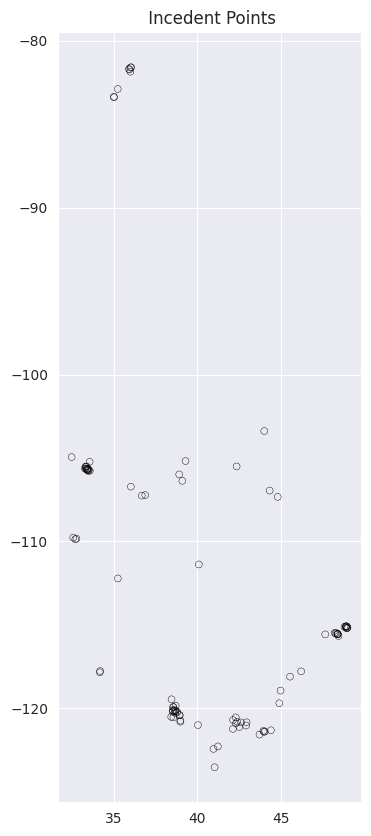

In [89]:
fig, ax = plt.subplots(figsize=(20, 10)) 
gdf.plot(markersize=0.1, ax=ax, aspect=1, facecolor="none", edgecolor="black", linewidth=5); 
ax.set_title(' Incedent Points') 
plt.show()




In [49]:
# creating a projection 
projected_gdf = gdf.to_crs({'init': 'epsg:32618'})
projected_gdf.head()

/opt/conda/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,geometry
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,0,0,0,0,0.00,2005,2453403.50,33,1300,9.00,6,2453403.50,33.00,1730,0.10,0,40.04,-121.01,5.00,USFS,1,63,063,20,91,POINT (inf inf)
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,0,0,0,0,0.00,2004,2453137.50,133,0845,1.00,5,2453137.50,133.00,1530,0.25,0,38.93,-120.40,5.00,USFS,1,61,061,19,35,POINT (inf inf)
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,0,0,0,0,0.00,2004,2453156.50,152,1921,5.00,3,2453156.50,152.00,2024,0.10,0,38.98,-120.74,13.00,STATE OR PRIVATE,1,17,017,9,82,POINT (inf inf)
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,0,DEER,0,0,0,0,0.00,2004,2453184.50,180,1600,1.00,5,2453189.50,185.00,1400,0.10,0,38.56,-119.91,5.00,USFS,1,3,003,0,60,POINT (inf inf)
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,0,STEVENOT,0,0,0,0,0.00,2004,2453184.50,180,1600,1.00,5,2453189.50,185.00,1200,0.10,0,38.56,-119.93,5.00,USFS,1,3,003,0,25,POINT (inf inf)


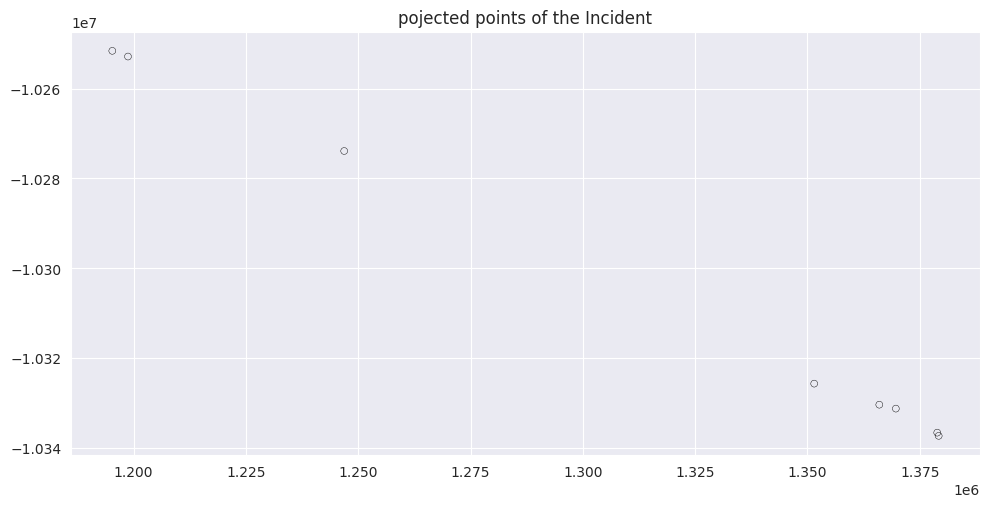

In [90]:
# plotting the projected values 
fig, ax = plt.subplots(figsize=(10, 10))
projected_gdf.plot(markersize=0.1,ax=ax, aspect=1, facecolor="none", edgecolor="black", linewidth=5);
ax.set_title('pojected points of the Incident')
plt.tight_layout()
plt.show()


##  <b><span style='color:#8F00FF'>| 1.1. </span> Resources I used for this Notebook </b>

- notebook by DAVE FISHER-HICKEY
- notebook by THJAQUENOUD
- notebook done by Dan 
- kaggle GeoSpatial Course 
- [Pygis Website](https://pygis.io/docs/e_buffer_neighbors.html) 
- [Introduction to GIS analysis](https://pmarchand1.github.io/atelier_rgeo/rgeo_workshop.html)
- GeoPandas Documentation 
- Folium Documentation
- [Math Planet](https://www.mathplanet.com/education/geometry/points-lines-planes-and-angles/an-introduction-to-geometry#:~:text=A%20point%20in%20geometry%20is,extends%20infinitely%20in%20two%20directions.)